In [16]:
# bloco com os imports
import numpy as np
# import pandas as pd
import sklearn as sk
from sklearn.gaussian_process import GaussianProcessRegressor
# import matplotlib as mp
import matplotlib.pyplot as pp
%matplotlib inline

In [17]:
# definindo a funcao que sera usada como exemplo
def fy(x,flag):
    if (flag == 0):
        y=np.log(np.abs(x))
    elif (flag == 1):
        y=x
    elif (flag == 2):
        y=x^2
    elif (flag == 3):
        y=sin(x)
    elif (flag == 4):
        y=np.arctan(x)
    else:
        y=0
    return y

In [18]:
# definindo um limite inferior para x
a=-10;
# definindo um limite superior para x
b=10;
# definindo numero de passos
num=30

# definindo um vetor x que vai de a ate b
# x=np.array(range(a,b+1))
x=np.linspace(a,b, num=num)

In [19]:
# definindo um vetor y = f(x) de acordo com o flag

# definindo o flag
flag = 4

# inicializando y com zeros
y=np.zeros_like(x)

# calculando y de acordo com o flag
for i in range(0,len(x)):
    
    y[i]=fy(x[i],flag)


In [20]:
# # criando um dataframe com x e y
# dat=pd.DataFrame({'x': x, 'ln': y})

In [21]:
# adicionando um ruido gaussiano (pelo menos assim espero!) a y

# criando um vetor de numeros sorteados na normal 0, 1
err=np.random.default_rng().normal(0, 1, len(y))
# normalizando o erro para que o maior valor corresponda a 5%
err=.05*err/max(np.abs(err))

# vendo se deu certo
# err


# criando um vetor y2 com o ruido
y2=y*(1+err)
y2=y + err*np.mean(np.abs(x))
# y2

In [22]:
# buscando os limites dos eixos

# minimo em x
minx = np.floor(min(x))
# maximo em x
maxx = np.ceil(max(x))

# minimo em y
miny = np.floor(min(y))
# maximo em y
maxy = np.ceil(max(y))


In [23]:
# # tentando plotar
# fig, ax = pp.subplots()
# # titulo do eixo x
# ax.set_xlabel('valores de x')
# # titulo do eixo y
# ax.set_ylabel('Teste')
# # limites do eixo x
# ax.set_xlim([minx, maxx])
# # limites do eixo y
# ax.set_ylim([miny, maxy])
# # comando para plotar usando linha solida
# # ax.plot(dat.x, dat.ln, '-');
# ax.plot(x, y, '-');

# # plotando y2 como bolinhas
# ax.plot(x, y2, 'ko');


In [24]:
# tentando aplicar o metodo Gaussian Process Regressor para estimar os dados
gpr = GaussianProcessRegressor().fit(x.reshape(-1,1),y2.reshape(-1,1))
yest = gpr.predict(x.reshape(-1,1), return_std=False)

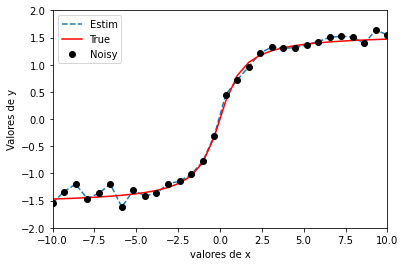

In [25]:
# tentando plotar os dados estimados
fig, ax = pp.subplots()
# titulo do eixo x
ax.set_xlabel('valores de x')
# titulo do eixo y
ax.set_ylabel('Valores de y')
# limites do eixo x
ax.set_xlim([minx, maxx])
# limites do eixo y
ax.set_ylim([miny, maxy])
# plotando os valores estimados
# ax.plot(dat.x, dat.ln, '-');
ax.plot(x, yest, '--', label = 'Estim');

# plotando os valores reais
ax.plot(x, y, 'r-', label = 'True');

# plotando os valores com ruido
ax.plot(x, y2, 'ko', label = 'Noisy');

# incluindo a legenda
# ax.legend('estm.', 'real')
ax.legend(loc="best", scatterpoints=1)

In [26]:
#  tentando montar uma divisao entre dados de entrada e saida
# para isso, vamos determinar um numero de pontos que serao considerados
# entrada na rede para prever o proximo ponto

# numero de pontos de entrada na rede
ent = 10; # esse numero foi escolhido arbitrariamente

# verificando se o numero de entradas e maior que o numero de pontos disponiveis
if ent >= num:
#     se ent > num, forcando que ent = 0.1 num
    ent = int(0.1*num)
# final do if

In [27]:
# criando uma matriz onde cada linha apresenta as ent entradas e depois o valor de saida

cond = 2

# inicializando a matriz com zeros
if cond == 1:
    xm = np.zeros((num-ent, ent+1))
else:
    xm = np.zeros((num-ent, ent))
    

for i in range(num-ent):
    for j in range(0,ent):
        xm[i,j]=x[i+j]
#     final do for do j
    if cond == 1:
        xm[i,ent]=y[i+ent-1];
# final do for do i

# fazendo um slicing no vetor de saida para pegar apenas as num - ent entradas
ym = y2[ent-1:-1]
# ym

In [28]:
# # aplicando agora o Gaussian Process Regressor passando a matriz a como entrada
# gpr = GaussianProcessRegressor().fit(xm,ym.reshape(-1,1))
# yest = gpr.predict(x.reshape(-1,1), return_std=False)
# yest

In [29]:
# tentando resolver o problema usando regressao linear com ent parametros de entrada
from sklearn.linear_model import LinearRegression as linreg
from sklearn.preprocessing import PolynomialFeatures as polyfeat
from sklearn.pipeline import make_pipeline as pipe
from sklearn.linear_model import Ridge

# selecionando o grau do polinomio que vai aproximar a funcao
deg = 10

# criando o modelo
regr = linreg()
# regr2 = pipe([("polynomial_features", polyfeat),("linear_regression", linreg())])

regr2 = pipe(polyfeat(deg), Ridge(alpha = 1e-3) )


# treinando o modelo
regr.fit(x.reshape(-1,1), y.reshape(-1,1))

regr2.fit(x.reshape(-1,1),y.reshape(-1,1))

# estimando os dados com base no modelo
yreg = regr.predict(x.reshape(-1,1))
yreg2 = regr2.predict(x.reshape(-1,1))


# print(xm.shape)

# print(yreg2)

C:\Users\renan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.63392e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


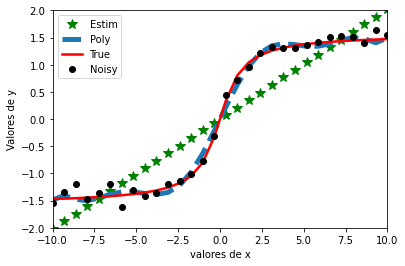

In [30]:
# tentando plotar os dados estimados
fig, ax = pp.subplots()
# titulo do eixo x
ax.set_xlabel('valores de x')
# titulo do eixo y
ax.set_ylabel('Valores de y')
# limites do eixo x
ax.set_xlim([minx, maxx])
# limites do eixo y
ax.set_ylim([miny, maxy])
# plotando os valores estimados
# ax.plot(dat.x, dat.ln, '-');
ax.plot(x, yreg, 'g*', label = 'Estim', markersize = 10);
ax.plot(x, yreg2, '--', label = 'Poly', linewidth = 5);
# ax.plot(xm[:,1], yreg2, 'g-*', label = 'Poly', linewidth = 5);

# plotando os valores reais
ax.plot(x, y, 'r-', label = 'True', linewidth = 2.5);

# plotando os valores com ruido
ax.plot(x, y2, 'ko', label = 'Noisy');

# incluindo a legenda
# ax.legend('estm.', 'real')
ax.legend(loc="best", scatterpoints=1)